# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:nds

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands

We now build a linear regression model which can help us find out in distinguishing the above 2 requirements. For building a model we need to follow 7 steps.

* Step 1: Reading and Understanding the Data 
* Step 2: Visualising the Data
* Step 3: Data Preparation
* Step 4: Splitting the Data into Training and Testing Sets
* Step 5: Rescaling the Features
* Step 6: Building a linear model
* Step 7: Residual Analysis of the train data
* Step 8: Making Predictions Using the Final Model
* Step 9: Model Evaluation

Lets start with the first Step 

### Step 1: Reading and Understanding the Data

In [1]:
# Import required modules, supress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Read the data & print first few records
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
# Lets get the data additional atributes
bike_df.shape
bike_df.info()
bike_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3]:
# percentage of missing values in rows & columns
print(round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [4]:
print(round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False))

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64


In [5]:
# Checking for duplicate values

bike_cp = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_cp.drop_duplicates(subset=None, inplace=True)
bike_cp.shape

(730, 16)

**Inferences from data**
- It has 730 rows & 16 columns
- cnt is our target variable that we need to predict
- No null values in rows & columns
- No duplicate values in the data

#### Performing Data Cleaning

In [6]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


* Having a look at the data instant, dteday, casual, registered columns can be dropped
* instant seems to be a record id which cannot contribute much to the data.
* dteday need not be there because month & year are already present.
* casual & registered is summing up to cnt, so these can cause multicolinearity. It can be dropped

In [7]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [8]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


**From this data, there are clearly some categorical columns. They can be modified in data preparation section**
- season {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
- mnth {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
- weekday {0:"Sun" ,1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'}
- weathersit {1:'Clear',2:'Cloudy',3:'Light_snow_rain',4:'Heavy_snow_rain'}

### Step 2: Visualising the Data

**Steps to perform**
- Check if the data has outliers
- What's the correlation between data by plotting pair plots(To check if we can go ahead with linear regression model)

In [10]:
# Importing modules that are required for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Checking for any outliers
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

**Box Plotting for bigger numbers**

In [13]:
cols_to_plot = ['temp', 'atemp', 'hum', 'windspeed']

In [14]:
def mark_box_plots(df, columns):
    i=1
    plt.figure(figsize=(18,4))
    for column in columns:
        plt.subplot(1,4,i)
        sns.boxplot(y=df[column],data=bike_df)
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()
        i=i+1

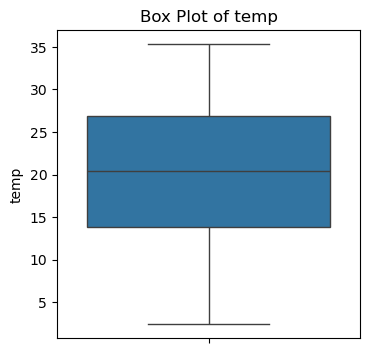

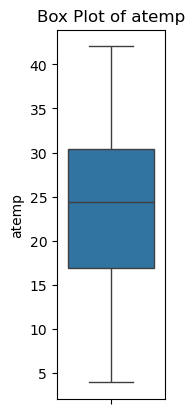

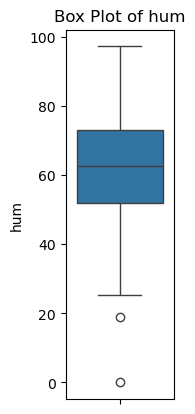

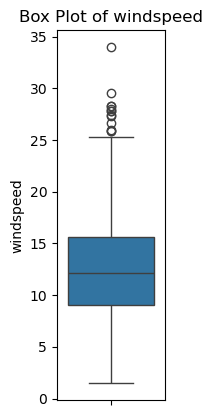

In [15]:
mark_box_plots(bike_df, cols_to_plot)

**So from the above plots it is clear that we don't have any outliers**

**Pair Plotting for bigger numbers**

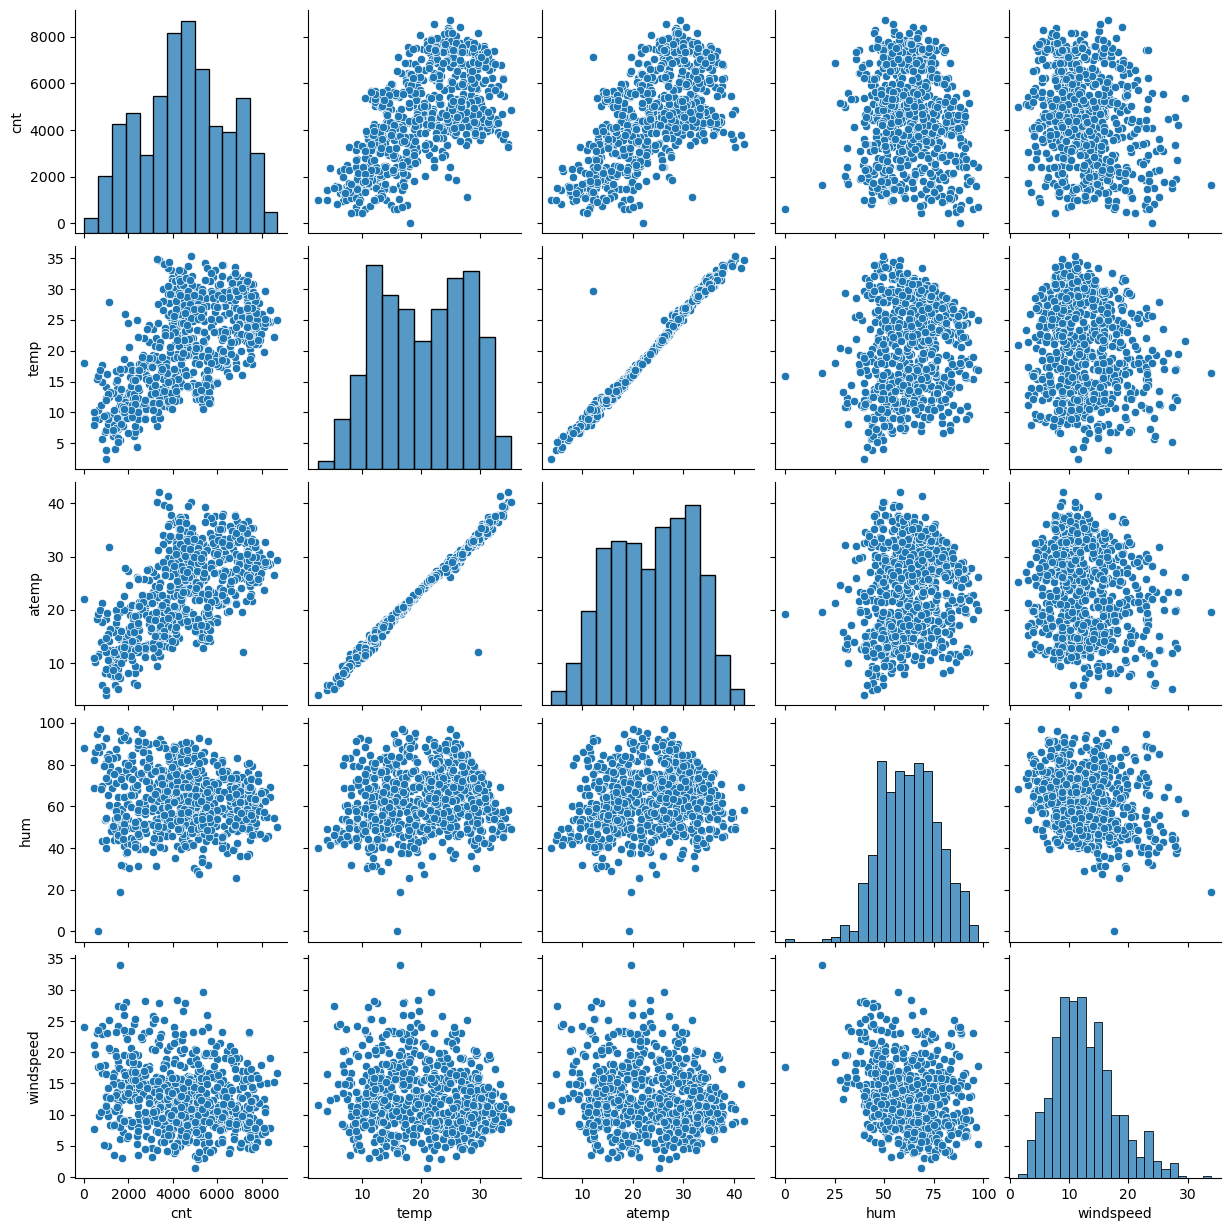

In [16]:
sns.pairplot(data=bike_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation- 
And from the plots we can also say that there is alinear relationship between TEMP and ATEMP

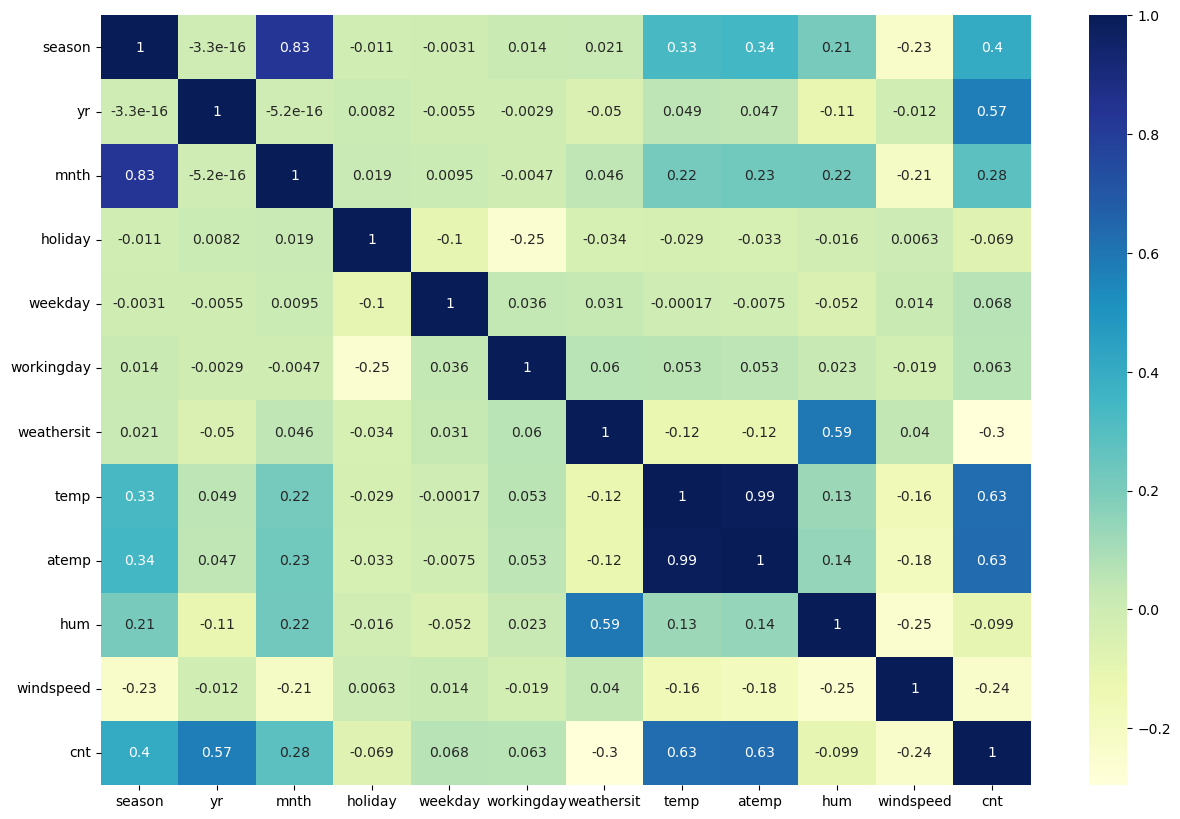

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

- **There are positive correlations like temp, atemp, and negative correlations like windspeed which makes fit for a linear correlation**
- **But we need to categorize non-numerical data which we will be doing in the next step**

### Step 3: Data Preperation

- Categorize non-numerical data
- Create dummy variables

In [18]:
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                                     7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


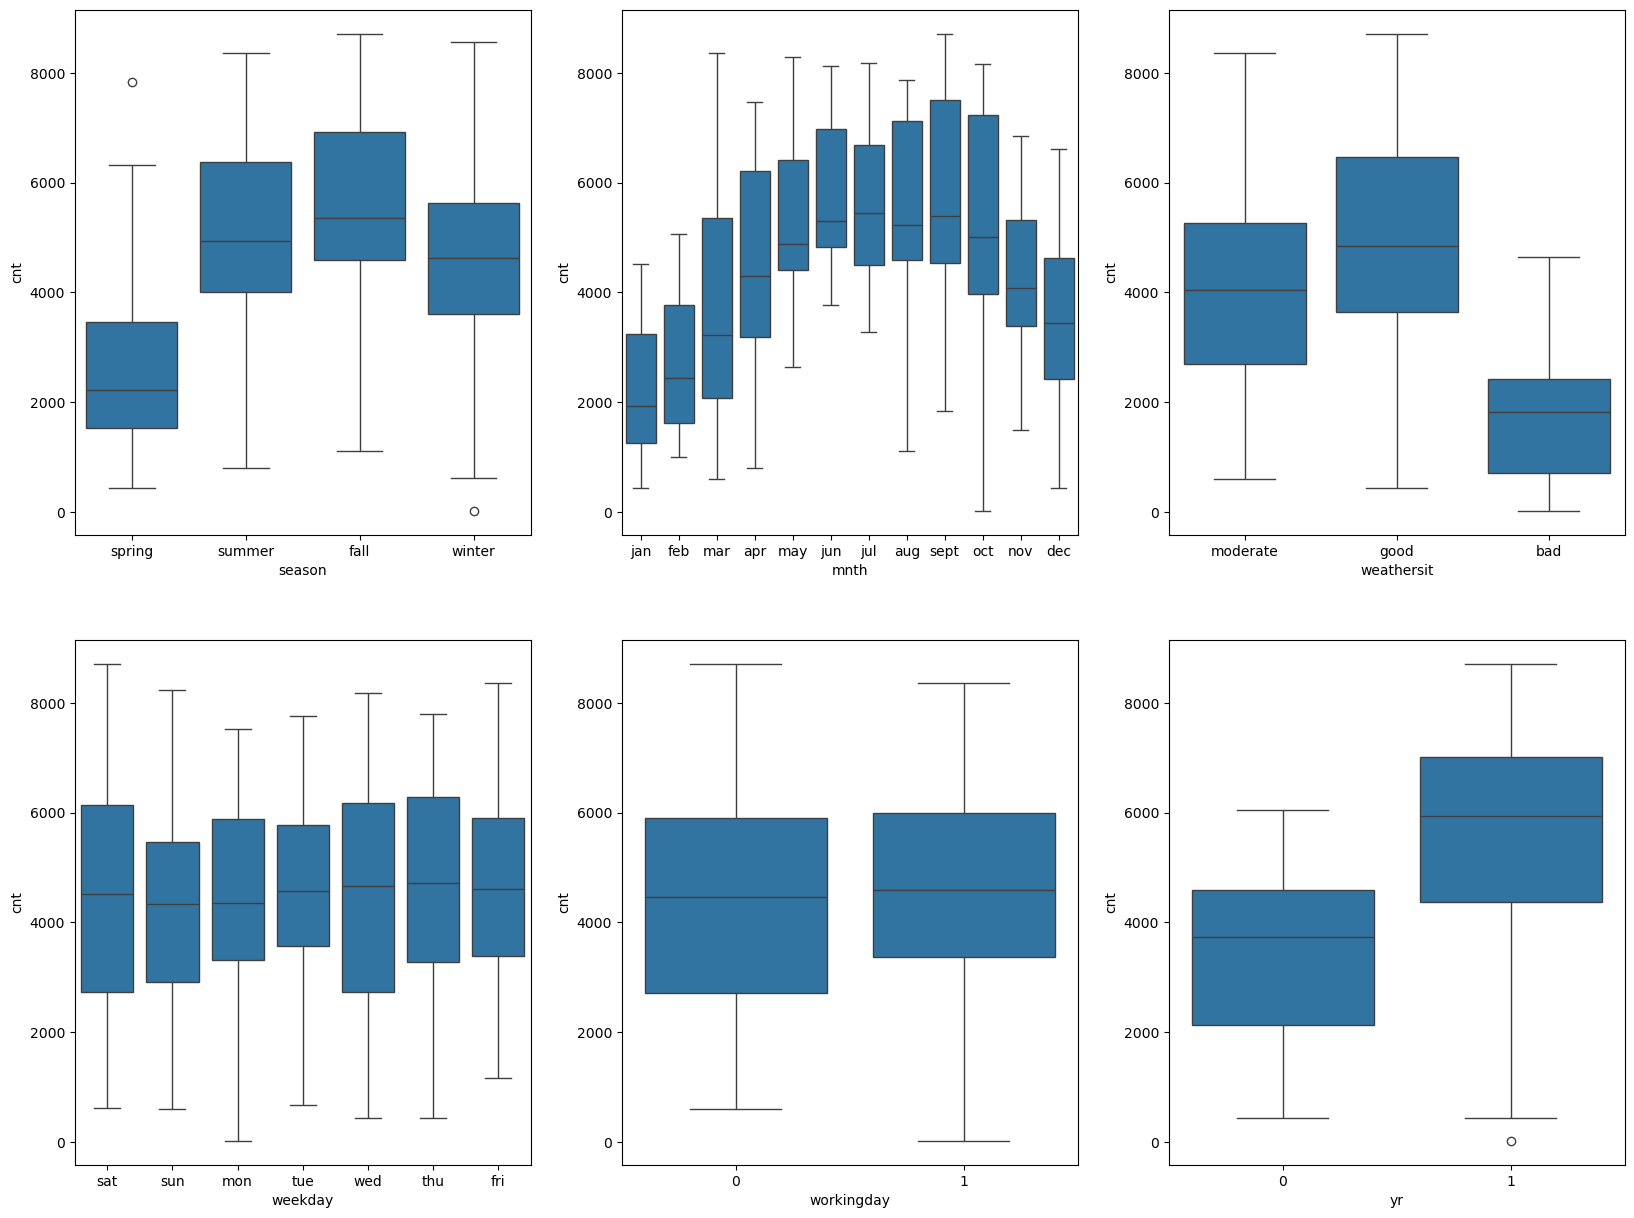

In [19]:
def visualize_categorical_values(columns):
    i=1
    plt.figure(figsize=(20,15))
    for column in columns:
        plt.subplot(2,3,i)
        sns.boxplot(x=bike_df[column],y=bike_df['cnt'],data=bike_df)
        i=i+1
visualize_categorical_values(['season','mnth','weathersit','weekday','workingday','yr'])

**Inferences**

- The graph effectively illustrates the qualitative distributions of the data. If the model identifies key predictors, these graphs can enhance our confidence in the model’s predictions.
- For the variable “season,” it’s evident that category 3 (Fall) has the highest median, indicating high demand during this season, while category 1 (Spring) has the lowest
- In 2019, the user count was higher compared to 2018. The rental count remains fairly consistent throughout the week.
- There are no users during heavy rain or snow, suggesting these weather conditions are quite adverse. The highest user count occurs when the weather is clear or partly cloudy.
- Rentals peaked in September and December. This aligns with weather observations, as substantial snowfall in December likely led to a decline in rentals.
- User count decreases during holidays.
- The “Workingday” boxplot shows that maximum bookings range between 4000 and 6000, indicating that the median user count is relatively constant throughout the week, with little difference in bookings between working days and non-working days.

##### Creating dummy Variables #####

The variables mnth, weekday, season, weathersit have various levels
- weathersit - 4 levels
- mnth - 12 levels.
- season - 3 levels
- weekday - 7 levels

Lets create DUMMY variables for these 4 categorical variables - mnth, weekday, season & weathersit.

In [20]:
dummy = bike_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)
bike_df = pd.concat([dummy,bike_df],axis = 1)
bike_df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)
bool_cols = bike_df.select_dtypes(include=['bool']).columns
bike_df[bool_cols] = bike_df[bool_cols].astype(int)
bike_df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_spring        730 non-null    int32  
 1   season_summer        730 non-null    int32  
 2   season_winter        730 non-null    int32  
 3   mnth_aug             730 non-null    int32  
 4   mnth_dec             730 non-null    int32  
 5   mnth_feb             730 non-null    int32  
 6   mnth_jan             730 non-null    int32  
 7   mnth_jul             730 non-null    int32  
 8   mnth_jun             730 non-null    int32  
 9   mnth_mar             730 non-null    int32  
 10  mnth_may             730 non-null    int32  
 11  mnth_nov             730 non-null    int32  
 12  mnth_oct             730 non-null    int32  
 13  mnth_sept            730 non-null    int32  
 14  weekday_mon          730 non-null    int32  
 15  weekday_sat          730 non-null    int

### Step 4: Splitting the Data into Training and Testing Sets

**Split the data set into Training set & data set**

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [23]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


### Step 5: Rescaling the Features

In [24]:
train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [25]:
train.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.625490,0.345098,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.484471,0.475867,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


You can see the mean values of temp, atemp, hum, windspped doesnt really scale with other values. Its important to scale the model.
Here we are using min-max scaling approach

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['cnt', 'temp','atemp','hum','windspeed']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [27]:
train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [28]:
train.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.625490,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.484471,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now the values fit to the linear regression model

In [29]:
# Dividing them into X & Y train sets
y_train = train.pop('cnt')
X_train = train
y_train.shape

(510,)

In [30]:
X_train.shape

(510, 29)

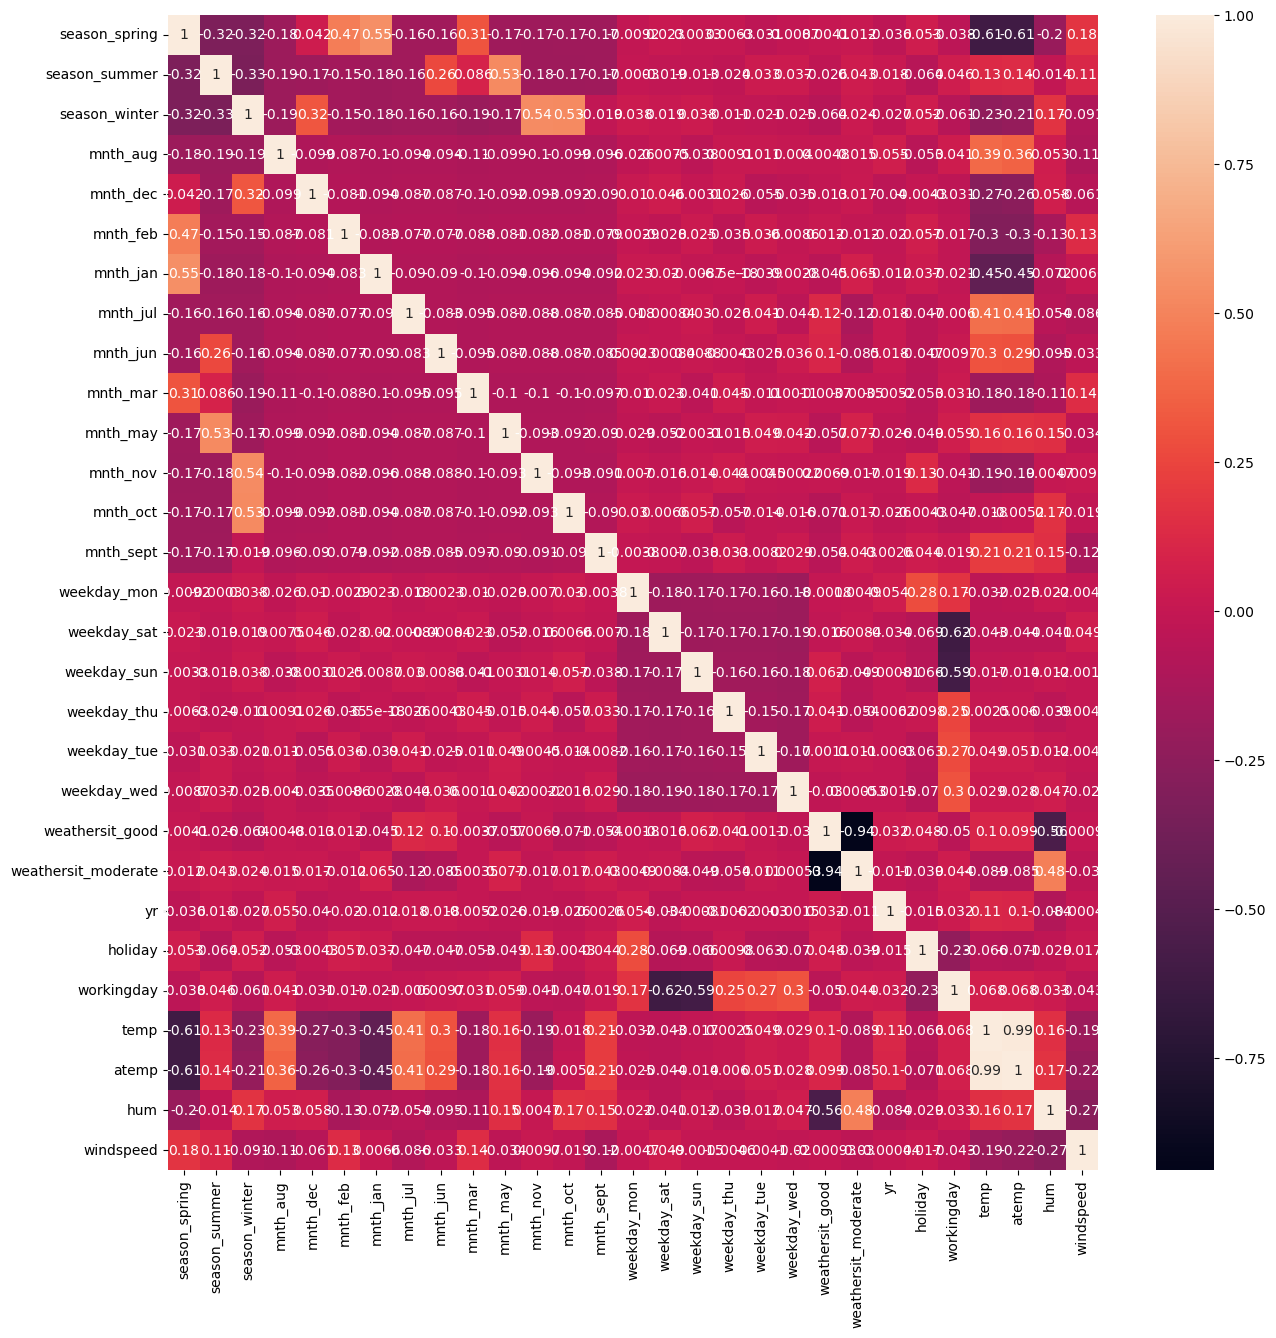

In [31]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Step 6: Building a linear model

**Creating Linear regression model using RFE**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Select 15 features automatically using RFE
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [34]:
selected_columns = X_train.columns[rfe.support_]
print('Dropped Columns: ',list(X_train.columns[~rfe.support_]))
print('Selected Columns: ',list(selected_columns))

Dropped Columns:  ['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'atemp']
Selected Columns:  ['season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed']


In [35]:
print('Full Columns: ',list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

Full Columns:  [('season_spring', True, 1), ('season_summer', True, 1), ('season_winter', True, 1), ('mnth_aug', False, 8), ('mnth_dec', False, 4), ('mnth_feb', False, 5), ('mnth_jan', False, 2), ('mnth_jul', True, 1), ('mnth_jun', False, 14), ('mnth_mar', False, 15), ('mnth_may', False, 7), ('mnth_nov', False, 3), ('mnth_oct', False, 12), ('mnth_sept', True, 1), ('weekday_mon', False, 9), ('weekday_sat', True, 1), ('weekday_sun', True, 1), ('weekday_thu', False, 11), ('weekday_tue', False, 10), ('weekday_wed', False, 13), ('weathersit_good', True, 1), ('weathersit_moderate', True, 1), ('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('atemp', False, 6), ('hum', True, 1), ('windspeed', True, 1)]


**So these are the selected columns**

Selected Columns:
- ['season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed']

In [36]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [37]:
import statsmodels.api as sm

In [38]:
# Adding constant to that dataframe.
X_train_lm = sm.add_constant(X_train_rfe)
X_train_lm.head()

,const,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weekday_sun,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,1,0,0,0,1,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,1,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,1,1,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,1,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


**Creating first Model**

In [39]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                510 non-null    float64
 1   season_spring        510 non-null    int32  
 2   season_summer        510 non-null    int32  
 3   season_winter        510 non-null    int32  
 4   mnth_jul             510 non-null    int32  
 5   mnth_sept            510 non-null    int32  
 6   weekday_sat          510 non-null    int32  
 7   weekday_sun          510 non-null    int32  
 8   weathersit_good      510 non-null    int32  
 9   weathersit_moderate  510 non-null    int32  
 10  yr                   510 non-null    int64  
 11  holiday              510 non-null    int64  
 12  workingday           510 non-null    int64  
 13  temp                 510 non-null    float64
 14  hum                  510 non-null    float64
 15  windspeed            510 non-null    float6

In [40]:
lm_1 = sm.OLS(y_train,X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        23:10:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0035      0.038      0.093      0.926      -0.071       0.078
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sept               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat             0.0447      0.013      3.422      0.001       0.019       0.070
weekday_sun            -0.0084      0.014     -0.599      0.550      -0.036       0.019
weathersit_good         0.2450      0.026      9.395      0.000       0.194       0.296
weathersit_moderate     0.1887      0.025      7.641      0.000       0.140       0.237
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.0674      0.022     -3.012      0.003      -0.111      -0.023
workingday              0.0347      0.011      3.044      0.002       0.012       0.057
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     4.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Here we see that weekday_sun has p value greater than 0.05. So drop weekday_sun**

In [41]:
X_train_lm = X_train_lm.drop(['weekday_sun'], axis=1)

In [42]:
lm_1 = sm.OLS(y_train,X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        23:10:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0048      0.048     -0.100      0.920      -0.100       0.090
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sept               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat             0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_good         0.2450      0.026      9.395      0.000       0.194       0.296
weathersit_moderate     0.1887      0.025      7.641      0.000       0.140       0.237
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday              0.0430      0.012      3.725      0.000       0.020       0.066
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Now we see all the P values are less than 0.05. So we can proceed to calculating VIF**

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Fucntion to calculate VIF for the features
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['Vif']  = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by="Vif",ascending=False)
    return vif

In [44]:
X_train_lm.pop("const")
calculate_vif(X_train_lm)

,features,Vif
12,hum,25.022598
11,temp,21.440261
6,weathersit_good,14.443629
7,weathersit_moderate,8.918107
0,season_spring,5.532210
10,workingday,5.413860
13,windspeed,4.660924
2,season_winter,4.025703
1,season_summer,3.192336
8,yr,2.091408


**Humidity has the highest VIF value. So dropping it & recalculating VIF**

In [45]:
X_train_lm.drop("hum",inplace=True,axis='columns')
calculate_vif(X_train_lm)

,features,Vif
6,weathersit_good,14.418515
11,temp,13.419351
7,weathersit_moderate,8.208568
10,workingday,5.325319
12,windspeed,4.634776
0,season_spring,4.155666
1,season_summer,2.784413
2,season_winter,2.728143
8,yr,2.074956
5,weekday_sat,1.985845


**We will relook at the stats model to check the p value & other values again**

In [46]:
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train,X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.28e-188
Time:                        23:10:48   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1320      0.039     -3.393      0.001      -0.208      -0.056
season_spring          -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer           0.0477      0.015      3.180      0.002       0.018       0.077
season_winter           0.0846      0.017      4.971      0.000       0.051       0.118
mnth_jul               -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_sept               0.0759      0.017      4.537      0.000       0.043       0.109
weekday_sat             0.0579      0.015      3.924      0.000       0.029       0.087
weathersit_good         0.2895      0.024     11.880      0.000       0.242       0.337
weathersit_moderate     0.2074      0.025      8.383      0.000       0.159       0.256
yr                      0.2337      0.008     28.828      0.000       0.218       0.250
holiday                -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday              0.0461      0.012      3.931      0.000       0.023       0.069
temp                    0.4915      0.033     15.027      0.000       0.427       0.556
windspeed              -0.1491      0.025     -6.024      0.000      -0.198      -0.100
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X_train_lm.pop("const")
calculate_vif(X_train_lm)

,features,Vif
6,weathersit_good,14.418515
11,temp,13.419351
7,weathersit_moderate,8.208568
10,workingday,5.325319
12,windspeed,4.634776
0,season_spring,4.155666
1,season_summer,2.784413
2,season_winter,2.728143
8,yr,2.074956
5,weekday_sat,1.985845


**Dropping weathersit_good as its having a higher VIF value**

In [48]:
X_train_lm.drop("weathersit_good",inplace=True,axis='columns')
calculate_vif(X_train_lm)

,features,Vif
10,temp,6.958951
9,workingday,5.185892
11,windspeed,4.598096
0,season_spring,2.486041
1,season_summer,2.335177
7,yr,2.063119
2,season_winter,1.958398
5,weekday_sat,1.953179
3,mnth_jul,1.584265
6,weathersit_moderate,1.541986


**From the correlation & other data we can see temp is highly correlated with cnt. Since the VIF value is between 5 to 10. We will consider dropping other values in combination**

*Dropping workingday & see if its impacted VIF of temp*

In [49]:
# Lets take a backup of train set
X_train_backup = X_train_lm.copy()

In [50]:
X_train_lm.drop("workingday",inplace=True,axis='columns')
calculate_vif(X_train_lm)

,features,Vif
9,temp,5.119064
10,windspeed,4.560567
1,season_summer,2.229520
0,season_spring,2.095984
7,yr,2.062077
2,season_winter,1.767751
3,mnth_jul,1.584237
6,weathersit_moderate,1.526931
4,mnth_sept,1.333057
5,weekday_sat,1.190764


In [51]:
# Now lets calculate the R2 scores
X_train_lm = sm.add_constant(X_train_lm)

lr_test = sm.OLS(y_train,X_train_lm).fit()
lr_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.62e-162
Time:                        23:10:48   Log-Likelihood:                 439.95
No. Observations:                 510   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -805.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1839      0.033      5.533      0.000       0.119       0.249
season_spring          -0.0598      0.024     -2.520      0.012      -0.106      -0.013
season_summer           0.0497      0.017      2.908      0.004       0.016       0.083
season_winter           0.0717      0.019      3.700      0.000       0.034       0.110
mnth_jul               -0.0551      0.021     -2.630      0.009      -0.096      -0.014
mnth_sept               0.0671      0.019      3.521      0.000       0.030       0.105
weekday_sat             0.0186      0.013      1.460      0.145      -0.006       0.044
weathersit_moderate    -0.0669      0.010     -6.864      0.000      -0.086      -0.048
yr                      0.2394      0.009     25.924      0.000       0.221       0.258
holiday                -0.0808      0.029     -2.756      0.006      -0.138      -0.023
temp                    0.5045      0.037     13.526      0.000       0.431       0.578
windspeed              -0.1791      0.028     -6.376      0.000      -0.234      -0.124
==============================================================================
Omnibus:                      139.104   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.568
Skew:                          -1.232   Prob(JB):                    2.68e-105
Kurtosis:                       7.073   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*R2 value is 0.793*

*Now lets find out if we drop temp*

In [52]:
X_train_lm = X_train_backup.copy()
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_spring        510 non-null    int32  
 1   season_summer        510 non-null    int32  
 2   season_winter        510 non-null    int32  
 3   mnth_jul             510 non-null    int32  
 4   mnth_sept            510 non-null    int32  
 5   weekday_sat          510 non-null    int32  
 6   weathersit_moderate  510 non-null    int32  
 7   yr                   510 non-null    int64  
 8   holiday              510 non-null    int64  
 9   workingday           510 non-null    int64  
 10  temp                 510 non-null    float64
 11  windspeed            510 non-null    float64
dtypes: float64(2), int32(7), int64(3)
memory usage: 37.9 KB


In [53]:
X_train_lm.drop("temp",inplace=True,axis='columns')
calculate_vif(X_train_lm)

,features,Vif
10,windspeed,4.174205
9,workingday,3.814786
0,season_spring,2.309674
1,season_summer,2.285212
2,season_winter,1.956559
7,yr,1.903623
5,weekday_sat,1.685814
6,weathersit_moderate,1.531971
3,mnth_jul,1.297599
4,mnth_sept,1.245158


In [54]:
# Now lets calculate the R2 scores
X_train_lm = sm.add_constant(X_train_lm)

lr_test = sm.OLS(y_train,X_train_lm).fit()
lr_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.04e-130
Time:                        23:10:49   Log-Likelihood:                 363.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     498   BIC:                            -652.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5452      0.023     24.107      0.000       0.501       0.590
season_spring          -0.2977      0.018    -16.213      0.000      -0.334      -0.262
season_summer          -0.0433      0.018     -2.385      0.017      -0.079      -0.008
season_winter          -0.0917      0.017     -5.258      0.000      -0.126      -0.057
mnth_jul               -0.0122      0.024     -0.506      0.613      -0.060       0.035
mnth_sept               0.0618      0.022      2.789      0.005       0.018       0.105
weekday_sat             0.0472      0.020      2.419      0.016       0.009       0.086
weathersit_moderate    -0.0773      0.011     -6.835      0.000      -0.100      -0.055
yr                      0.2534      0.011     23.771      0.000       0.232       0.274
holiday                -0.0515      0.036     -1.416      0.157      -0.123       0.020
workingday              0.0400      0.016      2.573      0.010       0.009       0.070
windspeed              -0.2028      0.033     -6.227      0.000      -0.267      -0.139
==============================================================================
Omnibus:                       76.796   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.751
Skew:                          -0.758   Prob(JB):                     1.15e-43
Kurtosis:                       5.647   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Although VIF value is lesser if we drop temp feature, the R2 value is getting impacted. So we should consider model with dropping working day*

In [55]:
X_train_lm = X_train_backup.copy()
X_train_lm.drop("workingday",inplace=True,axis='columns')
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_spring        510 non-null    int32  
 1   season_summer        510 non-null    int32  
 2   season_winter        510 non-null    int32  
 3   mnth_jul             510 non-null    int32  
 4   mnth_sept            510 non-null    int32  
 5   weekday_sat          510 non-null    int32  
 6   weathersit_moderate  510 non-null    int32  
 7   yr                   510 non-null    int64  
 8   holiday              510 non-null    int64  
 9   temp                 510 non-null    float64
 10  windspeed            510 non-null    float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 33.9 KB


In [56]:
X_train_lm = sm.add_constant(X_train_lm)
lr_final = sm.OLS(y_train,X_train_lm).fit()
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.62e-162
Time:                        23:10:49   Log-Likelihood:                 439.95
No. Observations:                 510   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -805.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1839      0.033      5.533      0.000       0.119       0.249
season_spring          -0.0598      0.024     -2.520      0.012      -0.106      -0.013
season_summer           0.0497      0.017      2.908      0.004       0.016       0.083
season_winter           0.0717      0.019      3.700      0.000       0.034       0.110
mnth_jul               -0.0551      0.021     -2.630      0.009      -0.096      -0.014
mnth_sept               0.0671      0.019      3.521      0.000       0.030       0.105
weekday_sat             0.0186      0.013      1.460      0.145      -0.006       0.044
weathersit_moderate    -0.0669      0.010     -6.864      0.000      -0.086      -0.048
yr                      0.2394      0.009     25.924      0.000       0.221       0.258
holiday                -0.0808      0.029     -2.756      0.006      -0.138      -0.023
temp                    0.5045      0.037     13.526      0.000       0.431       0.578
windspeed              -0.1791      0.028     -6.376      0.000      -0.234      -0.124
==============================================================================
Omnibus:                      139.104   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.568
Skew:                          -1.232   Prob(JB):                    2.68e-105
Kurtosis:                       7.073   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### So this is our final model

# Step 7: Residual Analysis of the train data


In [57]:
# predicting the y train values with x train 
y_train_pred = lr_final.predict(X_train_lm)

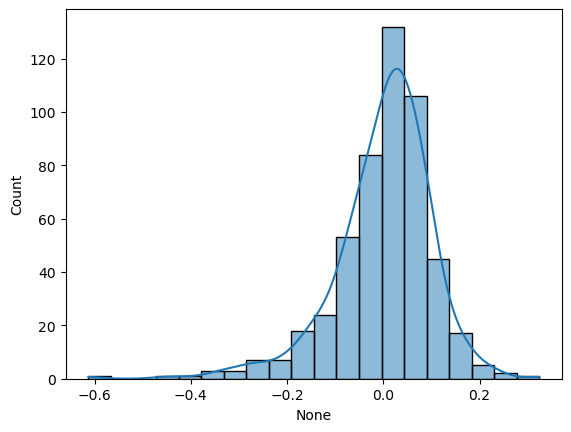

In [58]:
# checking normality of error terms
sns.histplot(x=(y_train - y_train_pred),bins=20,kde=True)
plt.show()

**Error terms are normally distributed.**

*Homoscedasticity check*

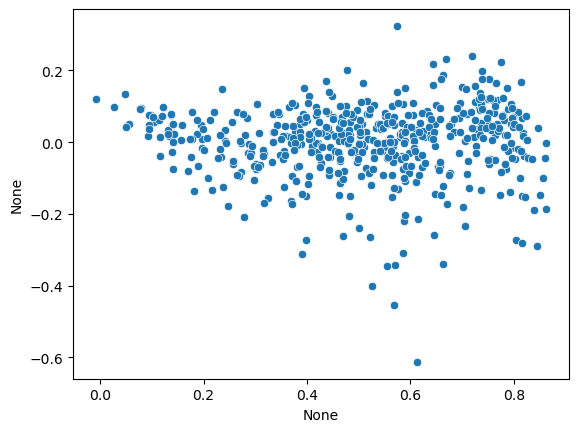

In [59]:
sns.scatterplot(x=y_train_pred,y=(y_train - y_train_pred))
plt.show()

**There is no visible pattern in residual values.**

# Step 8: Making Predictions Using the Final Model

In [60]:
print(test.shape)

(220, 30)


In [61]:
test.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.654545,0.318182,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.476601,0.466833,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000


**Apply scaling on the test data**

In [62]:
num_vars = ['cnt', 'temp','atemp','hum','windspeed']
test[num_vars] = scaler.transform(test[num_vars])

In [63]:
test.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [64]:
test.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.654545,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.476601,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [65]:
X_train_lm.pop('const')

576    1.0
426    1.0
728    1.0
482    1.0
111    1.0
      ... 
578    1.0
53     1.0
350    1.0
79     1.0
520    1.0
Name: const, Length: 510, dtype: float64

In [66]:
X_train_lm.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_moderate', 'yr', 'holiday',
       'temp', 'windspeed'],
      dtype='object')

In [67]:
y_test = test.pop("cnt")
X_test = test

X_test_rfe = X_test[['season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_moderate', 'yr', 'holiday',
       'temp', 'windspeed']]
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.head()

,const,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weathersit_moderate,yr,holiday,temp,windspeed
184,1.0,0,0,0,1,0,0,1,0,1,0.831783,0.084219
535,1.0,0,1,0,0,0,0,0,1,0,0.901354,0.153728
299,1.0,0,0,1,0,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,1,0,0,0,0,0,0,0,0.817246,0.537414


In [68]:
y_test_pred = lr_final.predict(X_test_rfe)

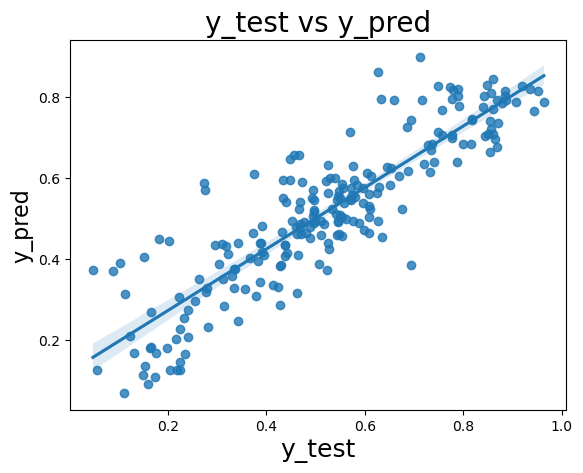

In [69]:
sns.regplot(x=(y_test),y=(y_test_pred),fit_reg=True)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

**Comparing the R2 scores for Test & Train data**

In [70]:
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
print('Train r2: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test r2: ',r2_score(y_true=y_test,y_pred=y_test_pred))

Train r2:  0.7925237054737143
Test r2:  0.7780295289190426


**Comparing the mean squared error for Test & Train data**

In [72]:
print('Train mean squared error: ',mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('Test mean squared error: ',mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Train mean squared error:  0.01042899638710853
Test mean squared error:  0.010613358146668486


**Final model equation co-efficients & constans**

In [73]:
lr_final.params

const                  0.183881
season_spring         -0.059810
season_summer          0.049720
season_winter          0.071669
mnth_jul              -0.055068
mnth_sept              0.067145
weekday_sat            0.018564
weathersit_moderate   -0.066934
yr                     0.239401
holiday               -0.080819
temp                   0.504532
windspeed             -0.179093
dtype: float64

*Final equation is cnt = 0.183881 - 0.059810*season_spring + 0.049720*season_summer + 0.071669*season_winter - 0.055068*mnth_jul + 0.067145*mnth_sept + 0.018564*weekday_sat - 0.066934*weathersit_moderate + 0.239401*yr - 0.080819*holiday + 0.504532*temp - 0.179093*windspeed*
